In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('final_data.csv')

# Display the first few rows of the dataframe
data.head()


,Unnamed: 0,Time,Max Temperature (°F),Avg Temperature (°F),Min Temperature (°F),Max Dew Point (°F),Avg Dew Point (°F),Min Dew Point (°F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (in),Avg Pressure (in),Min Pressure (in),Total Precipitation (in),City
0,0,2022-01-01,73,64.5,54,62,58.9,53,97,83.2,59,18,11.6,0,27.7,27.6,27.5,0.00,"London, UK"
1,1,2022-01-02,63,57.3,50,61,54.4,48,100,90.5,75,16,8.2,0,27.6,27.6,27.5,0.93,"London, UK"
2,2,2022-01-03,50,38.0,26,49,34.1,22,97,85.9,61,43,22.8,8,28.0,27.6,27.3,0.65,"London, UK"
3,3,2022-01-04,42,31.1,22,26,23.3,20,96,74.9,51,12,5.7,0,28.1,28.0,27.9,0.01,"London, UK"
4,4,2022-01-05,55,40.6,34,35,28.8,23,79,64.1,38,15,5.0,0,27.9,27.7,27.6,0.00,"London, UK"


In [3]:
# Checking for missing values
missing_values = data.isna().sum()
missing_values


Unnamed: 0                  0
Time                        0
Max Temperature (°F)        0
Avg Temperature (°F)        0
Min Temperature (°F)        0
Max Dew Point (°F)          0
Avg Dew Point (°F)          0
Min Dew Point (°F)          0
Max Humidity (%)            0
Avg Humidity (%)            0
Min Humidity (%)            0
Max Wind Speed (mph)        0
Avg Wind Speed (mph)        0
Min Wind Speed (mph)        0
Max Pressure (in)           0
Avg Pressure (in)           0
Min Pressure (in)           0
Total Precipitation (in)    0
City                        0
dtype: int64

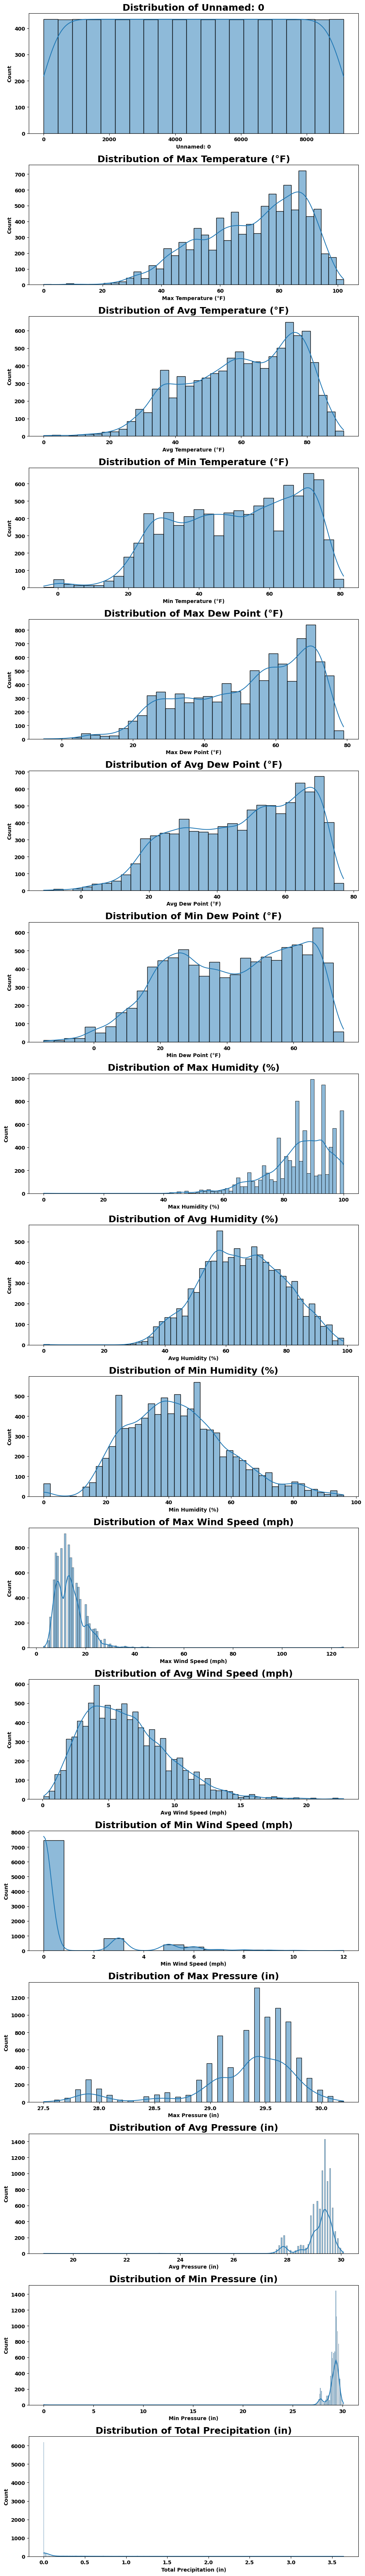

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
fig, axs = plt.subplots(len(numerical_columns), 1, figsize=(10, 70))

for i, col in enumerate(numerical_columns):
    sns.histplot(data=data, x=col, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}', fontsize=18)
    
plt.tight_layout()
plt.show()


((7300, 17), (1825, 17))

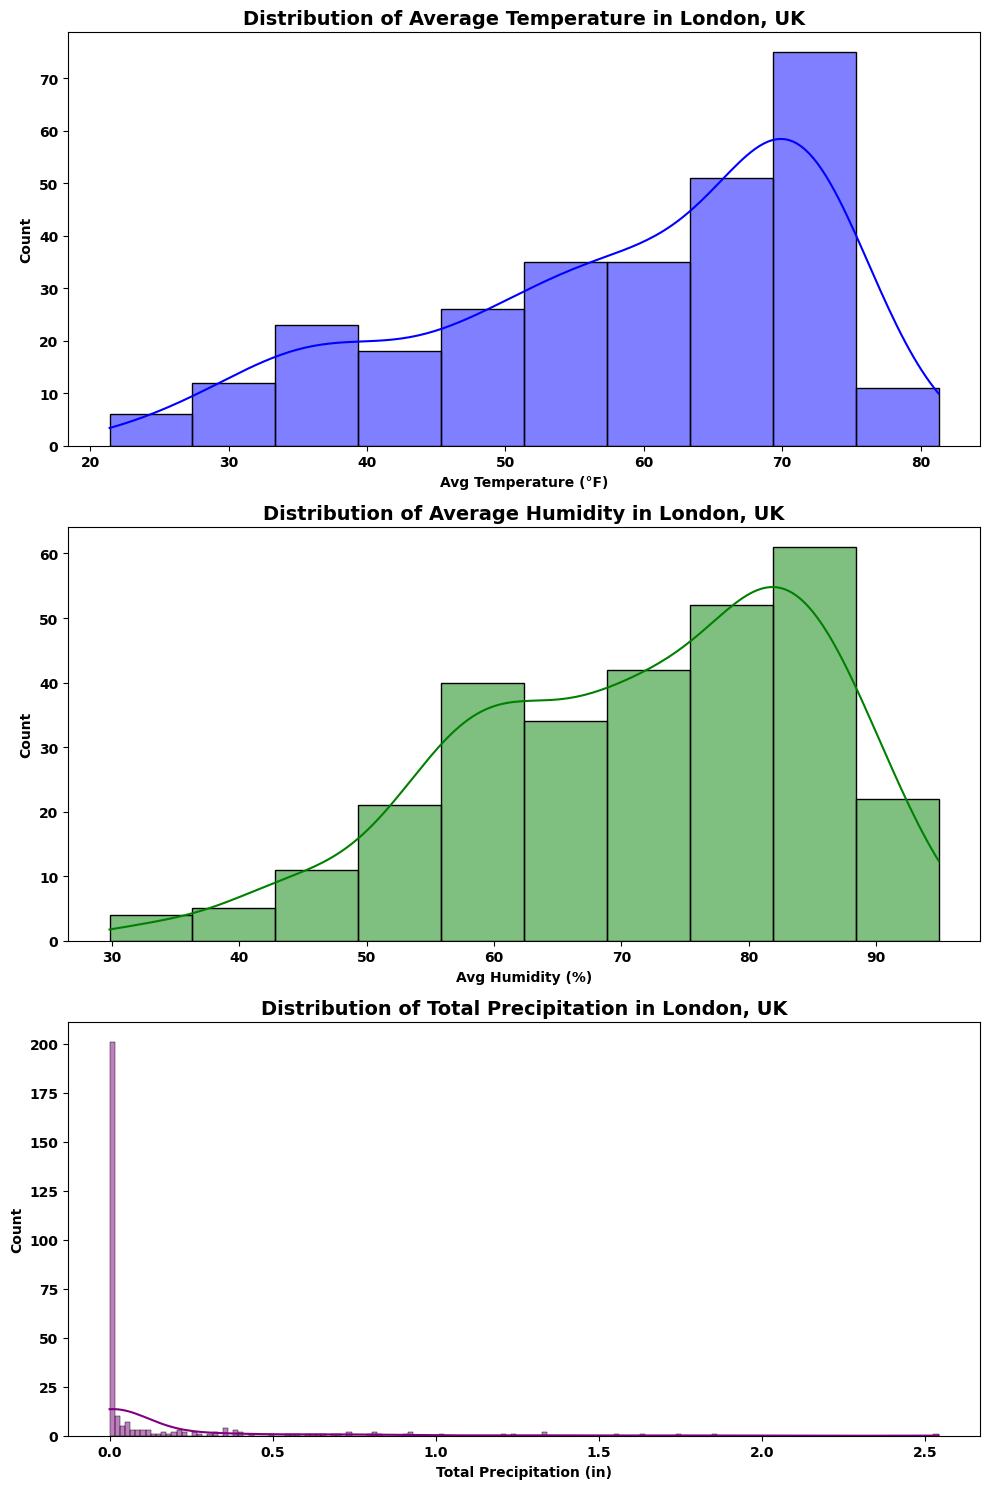

In [9]:
# Find the first city in the training set
first_city = X_train['City'].iloc[0]

# Subset the data for the first city
city_data = X_train[X_train['City'] == first_city].copy()  # make an explicit copy to avoid SettingWithCopyWarning
city_data.loc[:, 'Avg Temperature (°F)'] = y_train

# Create histograms for the three variables
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for Average Temperature
sns.histplot(city_data['Avg Temperature (°F)'], kde=True, ax=axs[0], color='blue')
axs[0].set_title(f'Distribution of Average Temperature in {first_city}', fontsize=14)
axs[0].set_xlabel('Avg Temperature (°F)')

# Histogram for Average Humidity
sns.histplot(city_data['Avg Humidity (%)'], kde=True, ax=axs[1], color='green')
axs[1].set_title(f'Distribution of Average Humidity in {first_city}', fontsize=14)
axs[1].set_xlabel('Avg Humidity (%)')

# Histogram for Total Precipitation
sns.histplot(city_data['Total Precipitation (in)'], kde=True, ax=axs[2], color='purple')
axs[2].set_title(f'Distribution of Total Precipitation in {first_city}', fontsize=14)
axs[2].set_xlabel('Total Precipitation (in)')

# Improve layout and plot the graph
fig.tight_layout()
plt.show()
